In [132]:
import numpy
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [158]:
with np.load('training-dataset.npz')  as data:
    img = data['x']
    lbl = data['y']

In [81]:
print(lbl)

[23  7 16 ... 13 15 19]


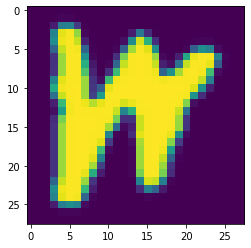

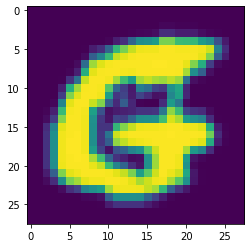

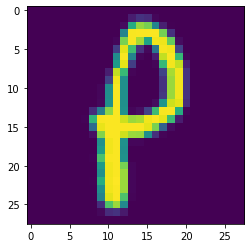

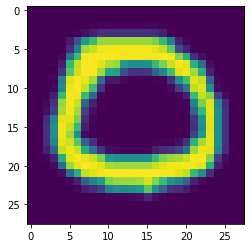

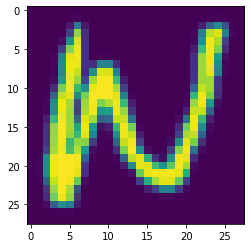

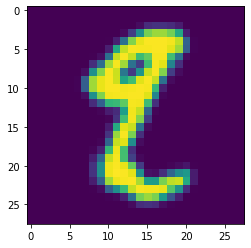

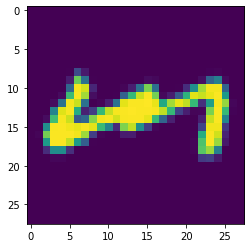

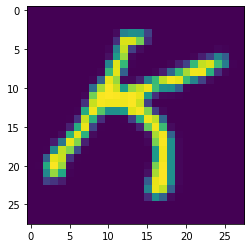

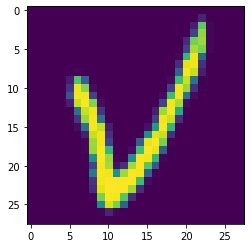

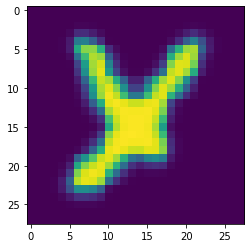

In [159]:
for im in range(10):
    image = img[im]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels)
    plt.show()

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img, lbl, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)


In [195]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(69888, 784)
(37440, 784)
(69888,)
(37440,)


In [196]:
print(y_test.shape)
print(X_val.shape)
print(y_train.shape)
print(X_val.shape)

(37440,)
(17472, 784)
(69888,)
(17472, 784)


In [197]:
print(y_train)
print(X_train)

[10 12  5 ... 18 24 25]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [198]:
X_train = X_train.reshape(43680, 784)
X_val = X_val.reshape(43680, 784)
X_test = X_test.reshape(37440, 784)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_val /= 255
X_test/= 255

ValueError: cannot reshape array of size 54792192 into shape (43680,784)

In [199]:
print(y_train)
print(X_val[1])

[10 12  5 ... 18 24 25]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   3   4   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  20 109 113  32   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   3  83 229 241 113   4   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  32  80  22   1   0   0
   0   2  77 220 254 250 127   4   0   0   0   0   0   0   0   0   0   0
   0   0   0   3 111 231 154  23   0   0   0   4 125 249 254 250 127   4
   0   0   0   0   0   0   0   0   0   0   0   0   0   2  77 247 234 131
  32   0   0   4 115 246 254 250 127   4   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  10 208 253 242 131  23   0   3  95 238 254 245
 114   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 115
 243 254 251 207  22  10 14

In [200]:
from sklearn.preprocessing import LabelBinarizer
onehot = LabelBinarizer()
Y_train = onehot.fit_transform(y_train)
Y_val   = onehot.transform(y_val)
Y_test = onehot.transform(y_test)
print(Y_test.shape)

(37440, 26)


In [201]:
print((Y_val))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [114]:
from keras import backend 

backend.clear_session()

In [202]:

# Normalize the images.
X_train = (X_train / 255) - 0.5
X_val = (X_val / 255) - 0.5

# Flatten the images.
X_train = X_train.reshape((-1, 784))
X_val = X_val.reshape((-1, 784))

print(X_train.shape) 
print(y_train.shape) 


(69888, 784)
(69888,)


In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
baseline = LogisticRegression()
baseline.fit(X_train, y_train)
print(1-accuracy_score(y_val, baseline.predict(X_val)))

/Users/manavmishra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.2783310439560439


In [170]:
print(accuracy_score(y_val, baseline.predict(X_val)))

0.7126602564102564


In [188]:
Ni = X_train.shape[1]
No = 26
Ns = y_train.size
alpha = 2
layer_size = int((Ns / (alpha * (Ni + No))))
print(layer_size)

26


In [189]:
## Neural nets
#.....................................
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam, SGD

#.....................................
model = Sequential()
model.add(Dense(layer_size, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(layer_size, activation='relu'))
model.add(Dense(Y_train.shape[1], activation='softmax')) # We need to have as many units as classes, 
                                                             # and softmax activation
optimizer = Adam(lr=0.0001)
# For classification, the loss function should be categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
43680/43680 [==============================] - 45s 1ms/step - loss: 2.3857 - accuracy: 0.3447
Epoch 2/100
43680/43680 [==============================] - 55s 1ms/step - loss: 1.4760 - accuracy: 0.5782
Epoch 3/100
43680/43680 [==============================] - 55s 1ms/step - loss: 1.2667 - accuracy: 0.6322
Epoch 4/100
43680/43680 [==============================] - 45s 1ms/step - loss: 1.1612 - accuracy: 0.6603
Epoch 5/100
43680/43680 [==============================] - 43s 977us/step - loss: 1.0909 - accuracy: 0.6786
Epoch 6/100
43680/43680 [==============================] - 42s 962us/step - loss: 1.0387 - accuracy: 0.6943
Epoch 7/100
43680/43680 [==============================] - 50s 1ms/step - loss: 0.9973 - accuracy: 0.7066 2s - l
Epoch 8/100
43680/43680 [==============================] - 51s 1ms/step - loss: 0.9632 - accuracy: 0.7176
Epoch 9/100
43680/43680 [==============================] - 48s 1ms/step - loss: 0.9345 - accuracy: 0.7250
Epoch 10/100
43680/43680 [=========

In [190]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_val, verbose=1)
print(accuracy_score(y_val, y_pred))

43680/43680 [==============================] - 11s 253us/step
0.008562271062271063


In [191]:
model.fit(X_val, Y_val, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
43680/43680 [==============================] - 48s 1ms/step - loss: 0.6298 - accuracy: 0.8165
Epoch 2/100
43680/43680 [==============================] - 43s 993us/step - loss: 0.6097 - accuracy: 0.8222
Epoch 3/100
43680/43680 [==============================] - 46s 1ms/step - loss: 0.5980 - accuracy: 0.8235
Epoch 4/100
43680/43680 [==============================] - 51s 1ms/step - loss: 0.5881 - accuracy: 0.8263
Epoch 5/100
43680/43680 [==============================] - 49s 1ms/step - loss: 0.5797 - accuracy: 0.8282
Epoch 6/100
43680/43680 [==============================] - 49s 1ms/step - loss: 0.5725 - accuracy: 0.8296
Epoch 7/100
43680/43680 [==============================] - 58s 1ms/step - loss: 0.5660 - accuracy: 0.8314
Epoch 8/100
43680/43680 [==============================] - 58s 1ms/step - loss: 0.5610 - accuracy: 0.8336
Epoch 9/100
43680/43680 [==============================] - 60s 1ms/step - loss: 0.5557 - accuracy: 0.8342
Epoch 10/100
43680/43680 [==================

In [192]:
y_pred_train = np.argmax(model.predict(X_train), axis=-1) #Predict_classes raises an error and cannot be used soon, thus we use this instead
acc_train = round(accuracy_score(y_train, y_pred_train), 3)

In [193]:
print(acc_train)

0.008


[13 22 16 16  2]
[14 23 17 17 11]
